In [ ]:
https://youtu.be/WvmFjuGxneI?si=GdKESkW7E6m5MQzB


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../data/Online-Retail.xlsx", parse_dates=['InvoiceDate'])
print("Dataset Size: "+ str(data.shape))
data.head(5)

Dataset Size: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [5]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# Modifying datatypes to save memory
def downcast_dtypes(df):
    float_cols = [c for c in df.columns if df[c].dtype == "float64"]
    int_cols = [c for c in df.columns if df[c].dtype in ["int64", "int32"]]
    object_cols = [ c for c in df.columns if df[c].dtype =='object']
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    df[object_cols] = df[object_cols].astype("category")
    return df

data = downcast_dtypes(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int16         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float32       
 6   CustomerID   406829 non-null  float32       
 7   Country      541909 non-null  category      
dtypes: category(4), datetime64[ns](1), float32(2), int16(1)
memory usage: 14.4 MB


missing values:

In [7]:
missing_count=data.isnull().sum()
missing_proportion=data.isnull().mean()
missing_data=pd.DataFrame({'count':missing_count,'proportion':missing_proportion})
missing_data

,count,proportion
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.002683
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,0.249267
Country,0,0.000000


removing missing data:

In [30]:
df=data.copy()
data=data.dropna(subset=['CustomerID'])


In [31]:
missing_count=data.isnull().sum()
missing_proportion=data.isnull().mean()
missing_data=pd.DataFrame({'count':missing_count,'proportion':missing_proportion})
missing_data

,count,proportion
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0
refunds,0,0.0


EDA

In [33]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.692383
min,-15459.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,15459.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,63.765079,NaN,69.291634,1713.568604


In [57]:
data = data[~data['Description'].isin(['POSTAGE', 'DOTCOM POSTAGE', 'CRUK Commission', 'Manual'])]
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,405136.000000,405136,405136.000000,405136.000000,405136.000000
mean,12.096437,2011-07-10 16:55:01.261206272,2.930269,15294.853516,20.456755
min,-15459.000000,2010-12-01 08:26:00,0.000000,12346.000000,-32154.718750
25%,2.000000,2011-04-06 15:02:00,1.250000,13969.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15159.000000,10.900000
75%,12.000000,2011-10-20 13:07:00,3.750000,16794.000000,19.500000
max,15459.000000,2011-12-09 12:50:00,1867.859985,18287.000000,38970.000000
std,63.735955,NaN,5.508277,1710.029053,120.934479


In [38]:
data['TotalSales']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000


In [43]:
max_date=max(data['InvoiceDate'])
min_date=min(data['InvoiceDate'])
print(max_date)
print(min_date)

2011-12-09 12:50:00
2010-12-01 08:26:00


* What are the most purchased products in the platform?

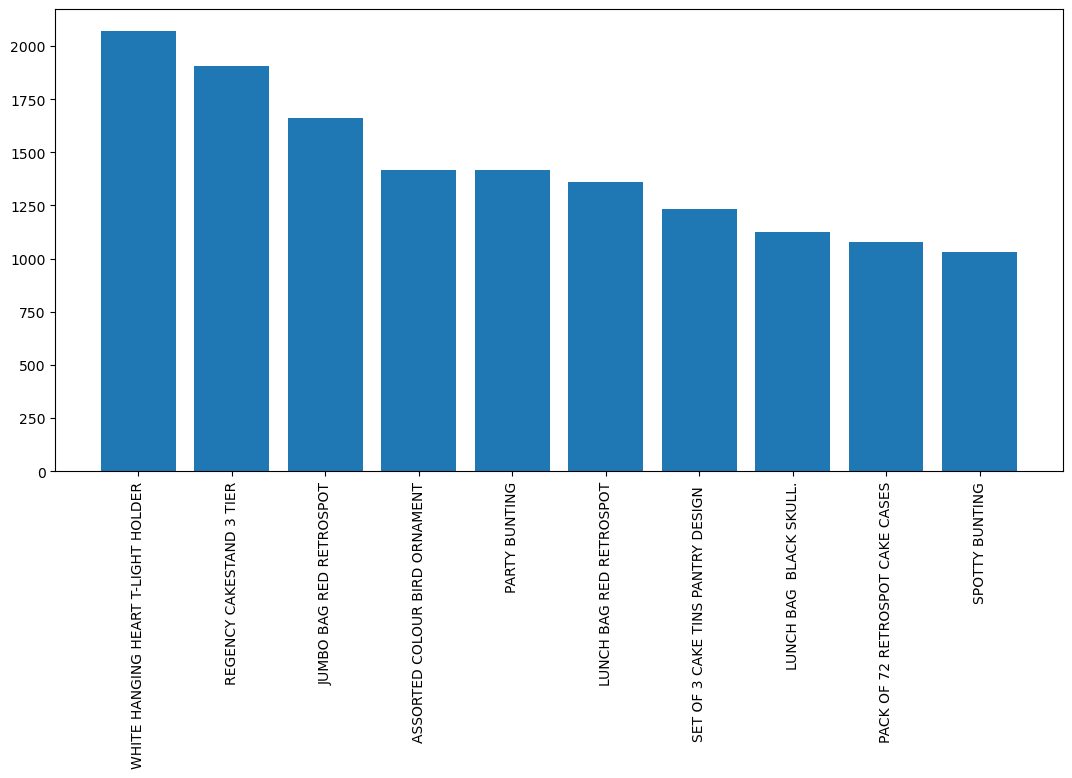

In [58]:
top_purchase=data.groupby('Description')['TotalSales'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(13,6))
plt.bar(top_purchase.index, top_purchase.values)
plt.xticks(rotation=90)
plt.show()

In [69]:
top_country=data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)


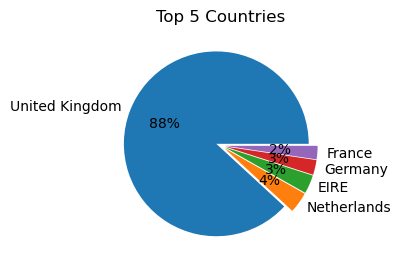

In [73]:
top5_labels=top_country[:5].index
top5_values=top_country[:5].values

plt.figure(figsize=(3,3))
plt.pie(top5_values, labels=top5_labels, autopct='%1.0f%%',explode=[0.05]*5)
plt.title('Top 5 Countries')
plt.show()

transaction trend

In [76]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.340000


In [84]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.200001
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.599999
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.600000
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.849999


#### RFM

In [80]:
day='2012-01-01'
day=pd.to_datetime(day)
day
# data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

Timestamp('2012-01-01 00:00:00')

In [95]:
recency = data.groupby(['CustomerID']).agg({"InvoiceDate": lambda x: ((day - x.min()).days)})


In [96]:
recency

,InvoiceDate
CustomerID,
12346.0,347
12347.0,389
12348.0,380
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,148


In [98]:
#frequency


freq=data.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [100]:
money=data.groupby(["CustomerID"])[["TotalSales"]].sum()
money

,TotalSales
CustomerID,
12346.0,0.000000
12347.0,4310.000000
12348.0,1437.239990
12349.0,1457.550049
12350.0,294.399994
...,...
18280.0,180.600006
18281.0,80.820000
18282.0,176.600006


In [101]:
RFM=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,InvoiceDate,InvoiceNo,TotalSales
CustomerID,,,
12346.0,347,2,0.000000
12347.0,389,7,4310.000000
12348.0,380,4,1437.239990
12349.0,40,1,1457.550049
12350.0,332,1,294.399994
...,...,...,...
18280.0,299,1,180.600006
18281.0,202,1,80.820000
18282.0,148,3,176.600006


In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

c:\Users\anany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

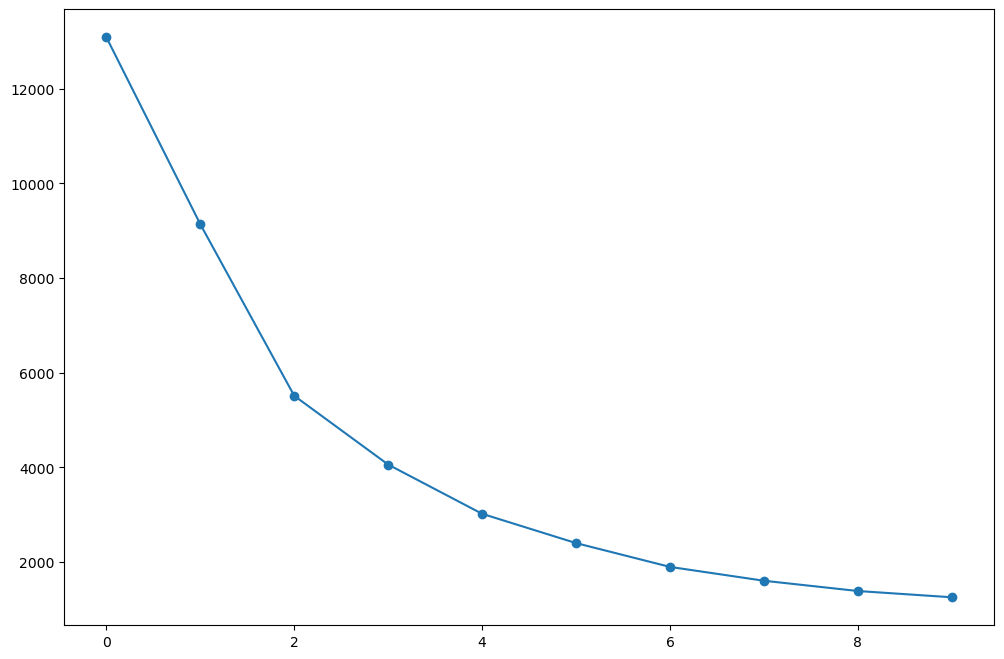

In [103]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [116]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

c:\Users\anany\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [117]:
RFM


,InvoiceDate,InvoiceNo,TotalSales,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.000000,2,Lapsed Cx
12347.0,389,7,4310.000000,2,Lapsed Cx
12348.0,380,4,1437.239990,2,Lapsed Cx
12349.0,40,1,1457.550049,1,Whales
12350.0,332,1,294.399994,2,Lapsed Cx
...,...,...,...,...,...
18280.0,299,1,180.600006,2,Lapsed Cx
18281.0,202,1,80.820000,1,Whales
18282.0,148,3,176.600006,1,Whales


In [106]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [124]:
def func(row):
    if row["Clusters"]==1:
        return 'Lapsed'
    elif row["Clusters"]==2:
        return 'Average'
    else:
        return 'Whales'

In [125]:
RFM['group']=RFM.apply(func, axis=1)

In [126]:
RFM

,InvoiceDate,InvoiceNo,TotalSales,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.000000,2,Average
12347.0,389,7,4310.000000,2,Average
12348.0,380,4,1437.239990,2,Average
12349.0,40,1,1457.550049,1,Lapsed
12350.0,332,1,294.399994,2,Average
...,...,...,...,...,...
18280.0,299,1,180.600006,2,Average
18281.0,202,1,80.820000,1,Lapsed
18282.0,148,3,176.600006,1,Lapsed


In [127]:
result=RFM.group.value_counts()

In [128]:
result

group
Average    2635
Lapsed     1706
Whales       22
Name: count, dtype: int64

<Axes: ylabel='group'>

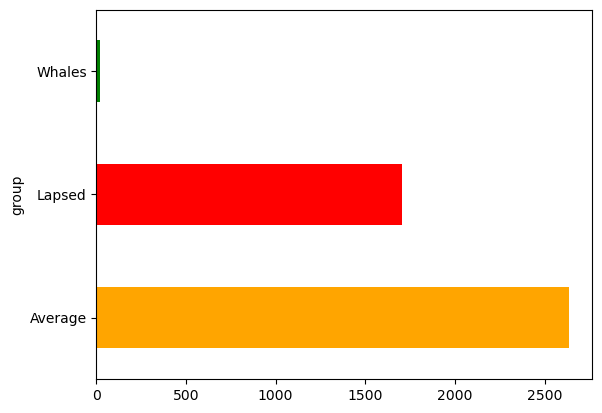

In [129]:
result.plot(kind="barh", color=["Orange","Red","Green"])